Naïve Bayes machine learning model that classifies the salary an NBA player deserves based on their statistics. 

Models are kept separate for ease of use, however there are several duplicate blocks between the two models.

# Binary Classifier

The initial goal is to classify a player as deserving of a max contract or a not. The threshold we chose for this is $30 million which corresponds roughly to the minimum qualification for a maximum contract. 
Source: https://www.hoopsrumors.com/2021/08/nba-maximum-salaries-for-2021-22.html

In [ ]:
# We first load the dataset from 'complete22-23.csv' into a pandas DataFrame
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("complete22-23.csv")
df.head

Saving complete22-23.csv to complete22-23 (9).csv


<bound method NDFrame.head of                  Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
0      Precious Achiuwa   C   23  TOR  55  12  20.7  3.6   7.3  0.485  ...   
1          Steven Adams   C   29  MEM  42  42  27.0  3.7   6.3  0.597  ...   
2           Bam Adebayo   C   25  MIA  75  75  34.6  8.0  14.9  0.540  ...   
3          Ochai Agbaji  SG   22  UTA  59  22  20.5  2.8   6.5  0.427  ...   
4          Santi Aldama  PF   22  MEM  77  20  21.8  3.2   6.8  0.470  ...   
..                  ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
445        Delon Wright  PG   30  WAS  50  14  24.4  2.8   5.8  0.474  ...   
446  McKinley Wright IV  PG   24  DAL  27   1  12.4  1.7   3.6  0.469  ...   
447      Thaddeus Young  PF   34  TOR  54   9  14.7  2.0   3.7  0.545  ...   
448          Trae Young  PG   24  ATL  73  73  34.8  8.2  19.0  0.429  ...   
449         Ivica Zubac   C   25  LAC  76  76  28.6  4.3   6.8  0.634  ...   

     OWS_div_USG  TS_times_USG   

Next we need to add the "Class" column to the dataset, which holds values of "Max" and "Not Max".

In [ ]:
# Adds the 'Class' column, where the value of 'Max' is given if the player makes
# more than $30 million, and 'Not Max' if not.
df['Class'] = df['Salary'].apply(lambda x: 'Max' if x >= 30 else 'Not Max')

The following step doesn't need to be run again, as it is just testing different random_states for train test split to find an optimal testing accuracy that is smaller than training accuracy. We don't want a model that has a higher testing than training as it is supposed to perform better on training.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)

# Drop "Class" from x since this is the target variable
x = df.drop("Class",1)
y = df["Class"]

max = 0
state = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)

  # We keep these features for future use since these features are being dropped
  x_train_dropped = pd.DataFrame({"Player": x_train["Player"], "Position": x_train["Pos"], "Team": x_train["Tm"]})
  x_test_dropped = pd.DataFrame({"Player": x_test["Player"], "Position": x_test["Pos"], "Team": x_test["Tm"]})

  # Drop the non-numerical features from the dataframe
  x_train = x_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
  x_test = x_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])
  y_train = y_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
  y_test = y_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])

  model = GaussianNB()
  model.fit(x_train, y_train)

  # Run our model on x_test
  y_pred = model.predict(x_test)

  # The weighted average f1, precision, and recall is the average between these 
  # scores for each class, weighted by the number of observations in each class.
  f1_averaged = f1_score(y_pred, y_test, average = "weighted")

  # Run our model on x_train
  y_pred_train = model.predict(x_train)

  # The weighted average f1, precision, and recall is the average between these 
  # scores for each class, weighted by the number of observations in each class.
  f1_averaged_train = f1_score(y_pred_train, y_train, average = "weighted")

  if (f1_averaged < f1_averaged_train):
    if (f1_averaged > max):
      max = f1_averaged
      state = i

print(max)
print(state)

<ipython-input-221-1b097eb84f17>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop("Class",1)


0.8611129186187749
60


Next we divide the data into x and y, where x is the set of features and y 
is the target variable. We also split the data into train and test data, and 
we choose the split size to be 25% for now.

In [ ]:
from sklearn.model_selection import train_test_split

# Drop "Class" from x since this is the target variable
x = df.drop("Class",1)
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 60)

# We keep these features for future use since these features are being dropped
x_train_dropped = pd.DataFrame({"Player": x_train["Player"], "Position": x_train["Pos"], "Team": x_train["Tm"]})
x_test_dropped = pd.DataFrame({"Player": x_test["Player"], "Position": x_test["Pos"], "Team": x_test["Tm"]})

# Drop the non-numerical features from the dataframe
x_train = x_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
x_test = x_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])
y_train = y_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
y_test = y_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])

<ipython-input-222-37aacfd230ba>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop("Class",1)


Fit our model to training data. We use Gaussian Naïve Bayes because it works great with numerical data

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

We now output our accuracy and f1 scores as well as a confusion matrix to 
visualize performance of our model. For binary classification, the accuracy scores are far lower when trying to predict if an observation belongs to class "Max" than for "Not Max". This isn't very surprising, as there are many more examples belonging to "Not Max". The weighted average is very good though. This weighted average is the average between the accuracy scores for each individual class ("Max" and "Not Max"). These averages are weighted by the number of observations in each class though, which is why it is not exactly halfway between the two scores for a certain metric.

Weighted average scores
F1 Score: 0.8611129186187749
Precision: 0.8718712579222523
Recall: 0.8761061946902655

Accuracy scores when predicting 'Max'
F1 Score: 0.5882352941176471
Precision: 0.8333333333333334
Recall: 0.45454545454545453

Accuracy scores when predicting 'Not Max'
F1 Score: 0.9270833333333333
Precision: 0.8811881188118812
Recall: 0.978021978021978


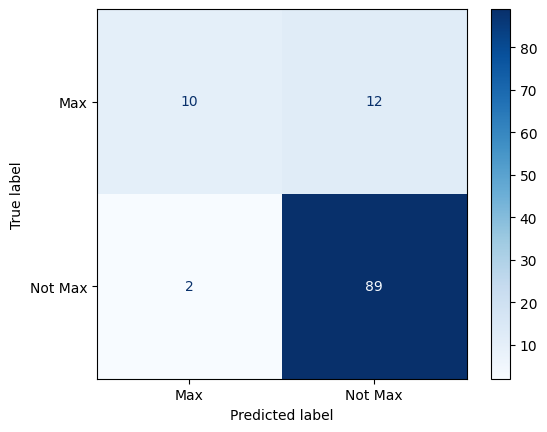

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)
# Labels for our confusion matrix
labels = ["Max","Not Max"]

# Run our model on x_test
y_pred = model.predict(x_test)

# The weighted average f1, precision, and recall is the average between these 
# scores for each class, weighted by the number of observations in each class.
f1_averaged = f1_score(y_pred, y_test, average = "weighted")
precision_averaged = precision_score(y_pred, y_test, average = "weighted")
recall_averaged = recall_score(y_pred, y_test, average = "weighted")
# Calculate the f1 score, precision, and recall for "Max"
f1_max = f1_score(y_pred, y_test, pos_label = "Max")
precision_max = precision_score(y_pred, y_test, pos_label = "Max")
recall_max = recall_score(y_pred, y_test, pos_label = "Max")
# Calculate the f1 score, precision, and recall for "Not Max"
f1_not_max = f1_score(y_pred, y_test, pos_label = "Not Max")
precision_not_max = precision_score(y_pred, y_test, pos_label = "Not Max")
recall_not_max = recall_score(y_pred, y_test, pos_label = "Not Max")


# Plot the confusion matrix and output the results
cm = confusion_matrix(y_pred, y_test, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = "Blues");
print("Weighted average scores")
print("F1 Score: " + str(f1_averaged))
print("Precision: " + str(precision_averaged))
print("Recall: " + str(recall_averaged))
print()
print("Accuracy scores when predicting 'Max'")
print("F1 Score: " + str(f1_max))
print("Precision: " + str(precision_max))
print("Recall: " + str(recall_max))
print()
print("Accuracy scores when predicting 'Not Max'")
print("F1 Score: " + str(f1_not_max))
print("Precision: " + str(precision_not_max))
print("Recall: " + str(recall_not_max))

We also run the model on x_train to see the results. The accuracy scores are slightly higher which is to be expected, but still pretty low when predicting class "Max".

Weighted average scores
F1 Score: 0.8771334393979676
Precision: 0.8838382302865203
Recall: 0.8902077151335311

Accuracy scores when predicting 'Max'
F1 Score: 0.5842696629213483
Precision: 0.8125
Recall: 0.45614035087719296

Accuracy scores when predicting 'Not Max'
F1 Score: 0.9367521367521368
Precision: 0.898360655737705
Recall: 0.9785714285714285


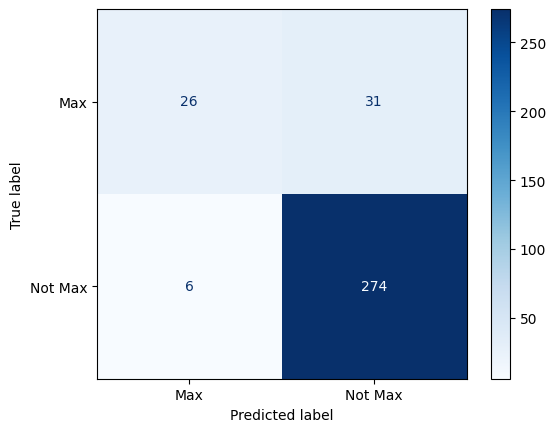

In [ ]:
# Run our model on x_train
y_pred_train = model.predict(x_train)

# The weighted average f1, precision, and recall is the average between these 
# scores for each class, weighted by the number of observations in each class.
f1_averaged_train = f1_score(y_pred_train, y_train, average = "weighted")
precision_averaged_train = precision_score(y_pred_train, y_train, average = "weighted")
recall_averaged_train = recall_score(y_pred_train, y_train, average = "weighted")
# Calculate the f1 score, precision, and recall for "Max"
f1_max_train = f1_score(y_pred_train, y_train, pos_label = "Max")
precision_max_train = precision_score(y_pred_train, y_train, pos_label = "Max")
recall_max_train = recall_score(y_pred_train, y_train, pos_label = "Max")
# Calculate the f1 score, precision, and recall for "Not Max"
f1_not_max_train = f1_score(y_pred_train, y_train, pos_label = "Not Max")
precision_not_max_train = precision_score(y_pred_train, y_train, pos_label = "Not Max")
recall_not_max_train = recall_score(y_pred_train, y_train, pos_label = "Not Max")

# Plot the confusion matrix and output the results
cm = confusion_matrix(y_pred_train, y_train, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = "Blues");
print("Weighted average scores")
print("F1 Score: " + str(f1_averaged_train))
print("Precision: " + str(precision_averaged_train))
print("Recall: " + str(recall_averaged_train))
print()
print("Accuracy scores when predicting 'Max'")
print("F1 Score: " + str(f1_max_train))
print("Precision: " + str(precision_max_train))
print("Recall: " + str(recall_max_train))
print()
print("Accuracy scores when predicting 'Not Max'")
print("F1 Score: " + str(f1_not_max_train))
print("Precision: " + str(precision_not_max_train))
print("Recall: " + str(recall_not_max_train))

Table and graph demonstrating the accuracy scores for both train/test data. The most important sections here are Test and Train as they give an accurate representation on how well our model predicts a given example.

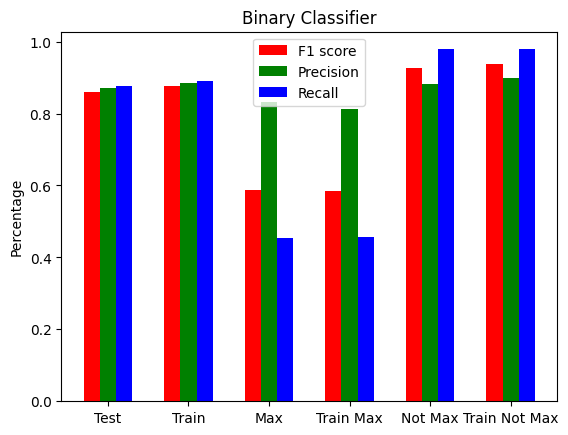

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 6
ind = np.arange(N) 
width = 0.2
  
# Create different bars for each metric. One for f1, one for precision, and one 
# for recall
y_f1 = [f1_averaged, f1_averaged_train, f1_max, f1_max_train, f1_not_max, f1_not_max_train]
bar1 = plt.bar(ind, y_f1, width, color = 'r')
  
y_precision = [precision_averaged, precision_averaged_train, precision_max, precision_max_train, precision_not_max,  
        precision_not_max_train]
bar2 = plt.bar(ind+width, y_precision, width, color='g')
  
y_recall = [recall_averaged, recall_averaged_train, recall_max, recall_max_train, recall_not_max,  
        recall_not_max_train]
bar3 = plt.bar(ind+width*2, y_recall, width, color = 'b')
  
plt.ylabel('Percentage')
plt.title("Binary Classifier")
  
plt.xticks(ind+width,["Test", "Train", "Max", "Train Max", 
     "Not Max", "Train Not Max"])
plt.legend( (bar1, bar2, bar3), ("F1 score", "Precision", "Recall") )
plt.show()

| Data | F1 Score | Precision | Recall |
| ---- | -------- | --------- | ------ |
| Test | 0.8611 | 0.8719 | 0.8761 |
| Train | 0.8771 | 0.8838 | 0.8902 |
| Max | 0.5882 | 0.8333 | 0.4545 |
| Train Max | 0.5842 | 0.8125  | 0.4561 |
| Not Max | 0.9271 | 0.8811 | 0.9780 |
| Train Not Max | 0.9368 | 0.8984 | 0.9786 |

Incorrect predictions for testing data

In [ ]:
prediction_df = x_test_dropped
prediction_df["Real Label"] = y_test
prediction_df["Predicted Label"] = y_pred
misclassified_observations = prediction_df.loc[prediction_df["Real Label"] != prediction_df["Predicted Label"]]
misclassified_observations

,Player,Position,Team,Real Label,Predicted Label
332,Jordan Poole,PG,GSW,Not Max,Max
160,Tyrese Haliburton,PG,IND,Not Max,Max
333,Kevin Porter Jr.,PG,HOU,Not Max,Max
417,John Wall,PG,LAC,Max,Not Max
140,Josh Giddey,SG,OKC,Not Max,Max
80,Nic Claxton,C,BRK,Not Max,Max
406,Fred VanVleet,PG,TOR,Not Max,Max
373,Ben Simmons,PG,BRK,Max,Not Max
441,Zion Williamson,PF,NOP,Not Max,Max
291,Ja Morant,PG,MEM,Not Max,Max


Incorrect predictions for training data

In [ ]:
# Output all players where the model's predictions were incorrect.
prediction_df_train = x_train_dropped
prediction_df_train["Real Label"] = y_train
prediction_df_train["Predicted Label"] = y_pred_train
misclassified_observations_train = prediction_df_train.loc[prediction_df_train["Real Label"] != prediction_df_train["Predicted Label"]]
misclassified_observations_train

,Player,Position,Team,Real Label,Predicted Label
269,Tyrese Maxey,SG,PHI,Not Max,Max
20,LaMelo Ball,PG,CHO,Not Max,Max
175,Gordon Hayward,SF,CHO,Max,Not Max
367,Alperen Şengün,C,HOU,Not Max,Max
432,Andrew Wiggins,SF,GSW,Max,Not Max
79,Jordan Clarkson,SG,UTA,Not Max,Max
179,Buddy Hield,SF,IND,Not Max,Max
169,Tobias Harris,PF,PHI,Max,Not Max
334,Michael Porter Jr.,SF,DEN,Max,Not Max
151,Jalen Green,SG,HOU,Not Max,Max


# Multiclass Classifier

When considering a Naïve Bayes multiclass classifier, we must decide how many classes our data should be trying to predict. In our case, each class represents a salary range. We choose this number to be three, as this provides a good estimate on the different ranges that appear. "Max" will now be represented as "2", meaning it is the highest paid group of players. "1" is a middle group of players ranging from $10-$30m. "0" is the lowest group of players making under $10m a year.

In [ ]:
# We first load the dataset from 'complete22-23multi.csv' into a pandas DataFrame
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("complete22-23multi.csv")
df.head

Saving complete22-23multi.csv to complete22-23multi (5).csv


<bound method NDFrame.head of                  Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
0      Precious Achiuwa   C   23  TOR  55  12  20.7  3.6   7.3  0.485  ...   
1          Steven Adams   C   29  MEM  42  42  27.0  3.7   6.3  0.597  ...   
2           Bam Adebayo   C   25  MIA  75  75  34.6  8.0  14.9  0.540  ...   
3          Ochai Agbaji  SG   22  UTA  59  22  20.5  2.8   6.5  0.427  ...   
4          Santi Aldama  PF   22  MEM  77  20  21.8  3.2   6.8  0.470  ...   
..                  ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
445        Delon Wright  PG   30  WAS  50  14  24.4  2.8   5.8  0.474  ...   
446  McKinley Wright IV  PG   24  DAL  27   1  12.4  1.7   3.6  0.469  ...   
447      Thaddeus Young  PF   34  TOR  54   9  14.7  2.0   3.7  0.545  ...   
448          Trae Young  PG   24  ATL  73  73  34.8  8.2  19.0  0.429  ...   
449         Ivica Zubac   C   25  LAC  76  76  28.6  4.3   6.8  0.634  ...   

     OWS_div_USG  TS_times_USG   

Add the "Class" column to the dataset and split players into three groups numbered 0-2 based on their salary range.

In [ ]:
# Adds the 'Class' column, where the value of 'Max' is given if the player makes
# more than $25 million, and 'Not Max' if not.
df['Class'] = df['Salary'].apply(lambda x: 2 if x >= 30 else (1 if (x < 30 and x >= 9) else 0))

The following step is to find the best random_state to use in train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)

# Drop "Class" from x since this is the target variable
x = df.drop("Class",1)
y = df["Class"]

max = 0
state = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)

  # We keep these features for future use since these features are being dropped
  x_train_dropped = pd.DataFrame({"Player": x_train["Player"], "Position": x_train["Pos"], "Team": x_train["Tm"]})
  x_test_dropped = pd.DataFrame({"Player": x_test["Player"], "Position": x_test["Pos"], "Team": x_test["Tm"]})

  # Drop the non-numerical features from the dataframe
  x_train = x_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
  x_test = x_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])
  y_train = y_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
  y_test = y_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])

  model = GaussianNB()
  model.fit(x_train, y_train)

  # Run our model on x_test
  y_pred = model.predict(x_test)

  # The weighted average f1, precision, and recall is the average between these 
  # scores for each class, weighted by the number of observations in each class.
  f1_averaged = f1_score(y_pred, y_test, average = "weighted")

  # Run our model on x_train
  y_pred_train = model.predict(x_train)

  # The weighted average f1, precision, and recall is the average between these 
  # scores for each class, weighted by the number of observations in each class.
  f1_averaged_train = f1_score(y_pred_train, y_train, average = "weighted")

  if (f1_averaged < f1_averaged_train):
    if (f1_averaged > max):
      max = f1_averaged
      state = i

print(max)
print(state)

<ipython-input-231-1aa9423b8e62>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop("Class",1)


0.7376573363222646
5


Next we divide the data into x and y, where x is the set of features and y is the target variable. We also split the data into train and test data, and we choose the split size to be 30% for now.

In [ ]:
from sklearn.model_selection import train_test_split

# Drop "Class" from x since this is the target variable
x = df.drop("Class", 1)
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

# We keep these features for future use since these features are being dropped
x_train_dropped = pd.DataFrame({"Player": x_train["Player"], "Position": x_train["Pos"], "Team": x_train["Tm"]})
x_test_dropped = pd.DataFrame({"Player": x_test["Player"], "Position": x_test["Pos"], "Team": x_test["Tm"]})

# Drop the non-numerical features from the dataframe
x_train = x_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
x_test = x_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])
y_train = y_train.drop(columns = ["Pos", "Tm", "Player", "Salary"])
y_test = y_test.drop(columns = ["Pos", "Tm", "Player", "Salary"])

<ipython-input-232-e63c5d0c90b6>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop("Class", 1)


Fit our model to training data. We use Gaussian Naïve Bayes because it works great with numerical data

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

Run our model on testing data and output a confusion matrix. Additionally, the accuracy scores are predicted for each category of salary. Note, the accuracy scores below represent the average of accuracies for each of the respective classes.

Accuracy scores
F1 Score: 0.7376573363222646
Precision: 0.733142635797503
Recall: 0.7433628318584071


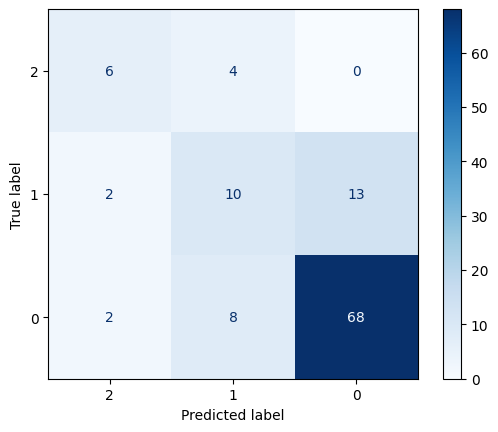

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)
# Labels for our confusion matrix
labels = [2, 1, 0]

# Run our model on x_test
y_pred = model.predict(x_test)
# Calculate the f1 score, precision, and recall for "Max"
f1 = f1_score(y_pred, y_test, average = "weighted")
precision = precision_score(y_pred, y_test, average = "weighted")
recall = recall_score(y_pred, y_test, average = "weighted")

# Plot the confusion matrix and output the results
cm = confusion_matrix(y_pred, y_test, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = "Blues");
print("Accuracy scores")
print("F1 Score: " + str(f1))
print("Precision: " + str(precision))
print("Recall: " + str(recall))

Running the model on training data.

Accuracy scores
F1 Score: 0.7454714948872274
Precision: 0.7455569867361659
Recall: 0.7477744807121661


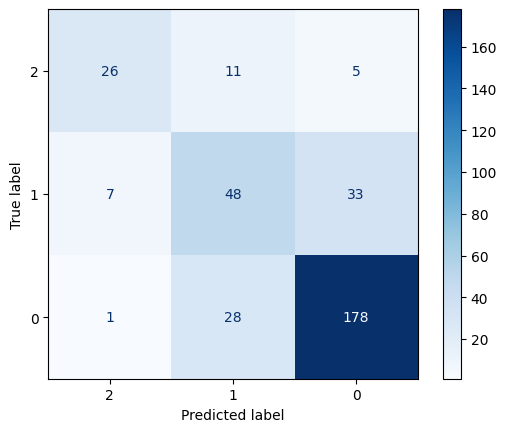

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score
)
# Labels for our confusion matrix
labels = [2, 1, 0]

# Run our model on x_test
y_pred_train = model.predict(x_train)
# Calculate the f1 score, precision, and recall for "Max"
f1_train = f1_score(y_pred_train, y_train, average = "weighted")
precision_train = precision_score(y_pred_train, y_train, average = "weighted")
recall_train = recall_score(y_pred_train, y_train, average = "weighted")

# Plot the confusion matrix and output the results
cm = confusion_matrix(y_pred_train, y_train, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = "Blues");
print("Accuracy scores")
print("F1 Score: " + str(f1_train))
print("Precision: " + str(precision_train))
print("Recall: " + str(recall_train))

Table demonstrating the accuracy scores for both train/test data. The training accuracy is actually a tad bit lower than the testing accuracy. This is most likely due to the fact that these are weighted averages between the three classes. These scores are actually lower than the weighted average scores for the binary classifier.

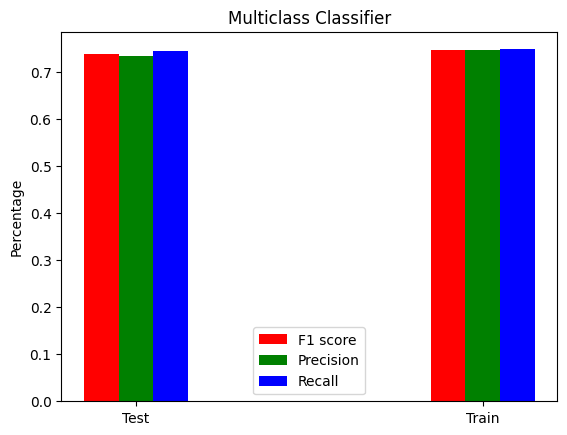

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 2
ind = np.arange(N) 
width = 0.1
  
y_f1 = [f1, f1_train]
bar1 = plt.bar(ind, y_f1, width, color = 'r')
  
y_precision = [precision, precision_train]
bar2 = plt.bar(ind+width, y_precision, width, color='g')
  
y_recall = [recall, recall_train]
bar3 = plt.bar(ind+width*2, y_recall, width, color = 'b')
  
plt.ylabel('Percentage')
plt.title("Multiclass Classifier")
  
plt.xticks(ind + width,["Test", "Train"])
plt.legend((bar1, bar2, bar3), ("F1 score", "Precision", "Recall") )
plt.show()

| Data | F1 Score | Precision | Recall |
| ---- | -------- | --------- | ------ |
| Test | 0.7377 | 0.7331 | 0.7434 |
| Train | 0.7455 | 0.7456 | 0.7478 |

Incorrect predictions for testing data.

In [ ]:
prediction_df = x_test_dropped
prediction_df["Real Label"] = y_test
prediction_df["Predicted Label"] = y_pred
misclassified_observations = prediction_df.loc[prediction_df["Real Label"] != prediction_df["Predicted Label"]]
misclassified_observations

,Player,Position,Team,Real Label,Predicted Label
333,Kevin Porter Jr.,PG,HOU,0,1
222,Luke Kennard,SG,TOT,1,0
197,Jaden Ivey,SG,DET,0,1
405,Jarred Vanderbilt,PF,TOT,0,1
357,Derrick Rose,PG,NYK,1,0
185,Richaun Holmes,C,SAC,1,0
52,Mikal Bridges,SF,TOT,1,2
296,Dejounte Murray,SG,ATL,1,2
367,Alperen Şengün,C,HOU,0,1
21,Mo Bamba,C,TOT,1,0


Incorrect predictions for training data.

In [ ]:
# Output all players where the model's predictions were incorrect.
prediction_df_train = x_train_dropped
prediction_df_train["Real Label"] = y_train
prediction_df_train["Predicted Label"] = y_pred_train
misclassified_observations_train = prediction_df_train.loc[prediction_df_train["Real Label"] != prediction_df_train["Predicted Label"]]

print("Player    Real Label   Predicted Label")
for index, row in misclassified_observations_train.iterrows():
  print(misclassified_observations_train.at[index, "Player"], misclassified_observations_train.at[index, "Real Label"], misclassified_observations_train.at[index, "Predicted Label"])

Player    Real Label   Predicted Label
Jalen Duren 0 1
Klay Thompson 2 1
Kevon Looney 0 1
Jae Crowder 1 0
Evan Fournier 1 0
Cole Anthony 0 1
Marcus Morris 1 0
Grayson Allen 0 1
Jaden McDaniels 0 1
Zach Collins 0 1
Jaylen Brown 1 2
Andrew Wiggins 2 1
Onyeka Okongwu 0 1
Delon Wright 0 1
Saddiq Bey 0 1
Reggie Jackson 1 0
Duncan Robinson 1 0
Jalen Brunson 1 2
Julius Randle 1 2
P.J. Washington 0 1
Isaiah Stewart 0 1
Darius Garland 0 2
Doug McDermott 1 0
Dāvis Bertāns 1 0
Dorian Finney-Smith 1 0
Jaren Jackson Jr. 1 2
Gary Harris 1 0
Desmond Bane 0 2
Keegan Murray 0 1
Nikola Vučević 1 2
Daniel Gafford 0 1
Ja Morant 1 2
LaMelo Ball 0 2
DeMar DeRozan 1 2
Khris Middleton 2 1
Kris Dunn 0 1
P.J. Tucker 1 0
John Wall 2 0
Dennis Schröder 0 1
Joe Harris 1 0
Donte DiVincenzo 0 1
Tyler Herro 0 1
Rudy Gobert 2 1
James Wiseman 1 0
Jalen Williams 0 1
Reggie Bullock 1 0
Tobias Harris 2 1
Franz Wagner 0 1
Paolo Banchero 1 2
Nerlens Noel 1 0
Josh Richardson 1 0
Tyrese Haliburton 0 2
Malik Beasley 1 0
Maxi Kl

# Conclusion

In conclusion, the binary classifier has higher accuracy scores in all categories. This is demonstrated in the table below:

| Data | F1 Score | Precision | Recall |
| ---- | -------- | --------- | ------ |
| Binary Test | 0.8611 | 0.8719 | 0.8761 |
| Binary Train | 0.8771 | 0.8838 | 0.8902 |
| Multi Test | 0.7377 | 0.7331 | 0.7434 |
| Multi Train | 0.7455 | 0.7456 | 0.7478 |